**Task2: Descriptive Analysis**

Task lists:

1. Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical
columns.

2. Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines"

3. Identify the top cuisines and cities with the highest number of restaurants.

In [73]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# importing dataset
new_data = pd.read_csv('new_data.csv')

In [75]:
new_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [76]:
# checking the descriptive statistics
new_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In trying to work on this task, I noticed the country code and the currency do not correspond to the respective city, address, and locality.  For this reason, caution may be observed when working on the statistics based on Price range and Average Cost for two.

In [77]:
# checking the data type of each column
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**1. Basic statistical calculations for numerical columns**

numerical columns that could be studied based on their statistics such as mean, median, mode, standard deviation, minimum, and maximum include the following:

i.   Average Cost for two

ii.  Price range

iii. Aggregate rating

iv.  Votes

**i. Basic statistics on the 'Average Cost for two'**

In [78]:
# Getting the mean value of the Average Cost for two
mean_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].mean()
mean_average_cost_for_two_per_currency

Currency
Botswana Pula(P)            1606.818182
Brazilian Real(R$)           134.666667
Dollar($)                     31.510373
Emirati Diram(AED)           166.416667
Indian Rupees(Rs.)           623.370319
Indonesian Rupiah(IDR)    281190.476190
NewZealand($)                 69.750000
Pounds()                      47.812500
Qatari Rial(QR)              223.750000
Rand(R)                      419.733333
Sri Lankan Rupee(LKR)       2375.000000
Turkish Lira(TL)              84.852941
Name: Average Cost for two, dtype: float64

In [79]:
# Getting the median value of the Average Cost for two
median_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].median()
median_average_cost_for_two_per_currency

Currency
Botswana Pula(P)            1150.0
Brazilian Real(R$)           100.0
Dollar($)                     25.0
Emirati Diram(AED)           145.0
Indian Rupees(Rs.)           450.0
Indonesian Rupiah(IDR)    200000.0
NewZealand($)                 60.0
Pounds()                      40.0
Qatari Rial(QR)              185.0
Rand(R)                      340.0
Sri Lankan Rupee(LKR)       2200.0
Turkish Lira(TL)              70.0
Name: Average Cost for two, dtype: float64

In [80]:
# Getting the modal value(s) of the Average Cost for two

'''Trial 1''' 
# modal_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].mode()
# modal_average_cost_for_two_per_currency

'''Trial 2'''
# modal_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].agg(pd.Series.mode)
# modal_average_cost_for_two_per_currency

'''
The above codes will result in the errors "AttributeError: 'SeriesGroupBy' object has no attribute 'mode'" and "ValueError: Must produce aggregated value" respectively
This is because the series column 'Average Cost for two' has multiple modal values as the code needs to return just one mode.  to resolve this, there will be need to aggregate the values returned.
'''

'\nThe above codes will result in the errors "AttributeError: \'SeriesGroupBy\' object has no attribute \'mode\'" and "ValueError: Must produce aggregated value" respectively\nThis is because the series column \'Average Cost for two\' has multiple modal values as the code needs to return just one mode.  to resolve this, there will be need to aggregate the values returned.\n'

In [81]:
# Method 1 handling multiple modes

# Group by 'Currency' and calculate the mode of 'Average Cost for two'
def get_modes(series):
    return series.mode().tolist()  # Convert mode series to a list

# Apply the custom function
modal_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].apply(get_modes)
modal_average_cost_for_two_per_currency

Currency
Botswana Pula(P)              [800, 1500]
Brazilian Real(R$)                  [100]
Dollar($)                            [25]
Emirati Diram(AED)        [100, 150, 250]
Indian Rupees(Rs.)                  [500]
Indonesian Rupiah(IDR)           [200000]
NewZealand($)                        [50]
Pounds()                             [30]
Qatari Rial(QR)                     [250]
Rand(R)                             [250]
Sri Lankan Rupee(LKR)              [2000]
Turkish Lira(TL)                 [70, 80]
Name: Average Cost for two, dtype: object

In [82]:
# Method 2 handling of multiple modes

modal_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].apply(lambda x: x.mode())
modal_average_cost_for_two_per_currency

Currency                 
Botswana Pula(P)        0       800
                        1      1500
Brazilian Real(R$)      0       100
Dollar($)               0        25
Emirati Diram(AED)      0       100
                        1       150
                        2       250
Indian Rupees(Rs.)      0       500
Indonesian Rupiah(IDR)  0    200000
NewZealand($)           0        50
Pounds()                0        30
Qatari Rial(QR)         0       250
Rand(R)                 0       250
Sri Lankan Rupee(LKR)   0      2000
Turkish Lira(TL)        0        70
                        1        80
Name: Average Cost for two, dtype: int64

In [83]:
# Handling single mode

# Function to return the mode or handle multiple modes
def get_mode(series):
    modes = series.mode()
    if not modes.empty:
        return modes.iloc[0]  # Return the first mode if there are multiple
    return None

# Group by 'Currency' and calculate the mode of 'Average Cost for two'
single_modal_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].apply(get_mode)

print(single_modal_average_cost_for_two_per_currency)

Currency
Botswana Pula(P)             800
Brazilian Real(R$)           100
Dollar($)                     25
Emirati Diram(AED)           100
Indian Rupees(Rs.)           500
Indonesian Rupiah(IDR)    200000
NewZealand($)                 50
Pounds()                      30
Qatari Rial(QR)              250
Rand(R)                      250
Sri Lankan Rupee(LKR)       2000
Turkish Lira(TL)              70
Name: Average Cost for two, dtype: int64


In [84]:
# Getting the standard deviation of the "Average Cost for two"
standardDev_average_cost_for_two_per_currency = new_data.groupby('Currency')['Average Cost for two'].std()
standardDev_average_cost_for_two_per_currency

Currency
Botswana Pula(P)            1268.510136
Brazilian Real(R$)            86.831547
Dollar($)                     41.879355
Emirati Diram(AED)           109.969532
Indian Rupees(Rs.)           595.676124
Indonesian Rupiah(IDR)    203543.022245
NewZealand($)                 37.824663
Pounds()                      34.520621
Qatari Rial(QR)              147.905331
Rand(R)                      422.196069
Sri Lankan Rupee(LKR)       1035.615759
Turkish Lira(TL)              64.555418
Name: Average Cost for two, dtype: float64

i**i. Basic statistics on the 'Price range'**

In [85]:
# Getting the mean value of the 'Price range'
mean_price_range_per_currency = new_data.groupby('Currency')['Price range'].mean()
mean_price_range_per_currency

Currency
Botswana Pula(P)          3.363636
Brazilian Real(R$)        3.400000
Dollar($)                 2.120332
Emirati Diram(AED)        3.216667
Indian Rupees(Rs.)        1.721683
Indonesian Rupiah(IDR)    2.952381
NewZealand($)             3.150000
Pounds()                  2.750000
Qatari Rial(QR)           3.650000
Rand(R)                   3.583333
Sri Lankan Rupee(LKR)     2.850000
Turkish Lira(TL)          2.823529
Name: Price range, dtype: float64

In [86]:
# Getting the median value of the 'Price range'
median_price_range_per_currency = new_data.groupby('Currency')['Price range'].median()
median_price_range_per_currency

Currency
Botswana Pula(P)          3.0
Brazilian Real(R$)        4.0
Dollar($)                 2.0
Emirati Diram(AED)        3.0
Indian Rupees(Rs.)        2.0
Indonesian Rupiah(IDR)    3.0
NewZealand($)             3.0
Pounds()                  3.0
Qatari Rial(QR)           4.0
Rand(R)                   4.0
Sri Lankan Rupee(LKR)     3.0
Turkish Lira(TL)          3.0
Name: Price range, dtype: float64

In [87]:
# Getting the modal value(s) of the 'Price range'
modal_price_range_per_currency = new_data.groupby('Currency')['Price range'].apply(lambda x: x.mode())
modal_price_range_per_currency

Currency                 
Botswana Pula(P)        0    3
Brazilian Real(R$)      0    4
Dollar($)               0    2
Emirati Diram(AED)      0    3
Indian Rupees(Rs.)      0    1
Indonesian Rupiah(IDR)  0    3
NewZealand($)           0    3
Pounds()                0    3
Qatari Rial(QR)         0    4
Rand(R)                 0    4
Sri Lankan Rupee(LKR)   0    3
Turkish Lira(TL)        0    3
Name: Price range, dtype: int64

In [88]:
# Getting the standard deviation of the 'price range'
standardDev_price_range_per_currency = new_data.groupby('Currency')['Price range'].std()
standardDev_price_range_per_currency

Currency
Botswana Pula(P)          0.581087
Brazilian Real(R$)        0.827494
Dollar($)                 0.922147
Emirati Diram(AED)        0.691147
Indian Rupees(Rs.)        0.852544
Indonesian Rupiah(IDR)    0.218218
NewZealand($)             0.892993
Pounds()                  0.834388
Qatari Rial(QR)           0.587143
Rand(R)                   0.618683
Sri Lankan Rupee(LKR)     0.670820
Turkish Lira(TL)          0.672877
Name: Price range, dtype: float64

**iii. Basic statistics on the 'Aggregate rating'**

In [89]:
# Getting the mean 'Aggregate rating'
mean_aggregate_rating = new_data['Aggregate rating'].mean()
mean_aggregate_rating

2.66637001361114

In [90]:
# Getting the median 'Aggregate rating'
median_aggregate_rating = new_data['Aggregate rating'].median()
median_aggregate_rating

3.2

In [91]:
# Getting the modal 'Aggregate rating'
modal_aggregate_rating = new_data['Aggregate rating'].mode()
modal_aggregate_rating

0    0.0
Name: Aggregate rating, dtype: float64

In [92]:
# Confirming/checking modal Aggregate rating
new_data['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [93]:
# Getting the standard deviation of the 'Aggegate rating'
standardDev_aggregate_rating = new_data['Aggregate rating'].std()
standardDev_aggregate_rating

1.5163775396521328

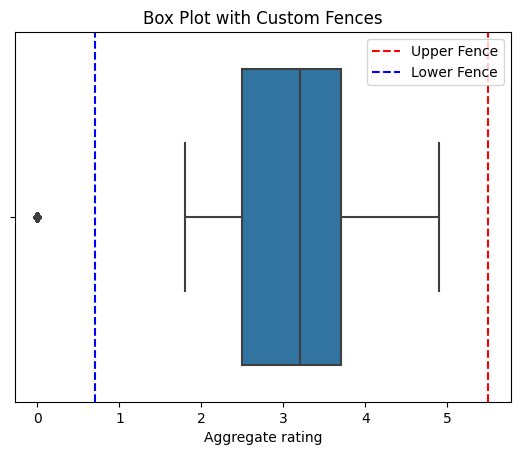

In [94]:
# Getting the upper and lower fence to check for outliers on Aggregate rating
Q1 = new_data['Aggregate rating'].quantile(0.25)
Q3 = new_data['Aggregate rating'].quantile(0.75)
Q2 = new_data['Aggregate rating'].quantile(0.5)
IQR = Q3 - Q1
IQR
Q1
Q2
Q3
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)

# Creating a box plot to indicate the location of upper fence and lower fence using vertical lines
sns.boxplot(x=new_data['Aggregate rating'])

# Optional: Add vertical lines for upper and lower fences
plt.axvline(x=upper_fence, color='r', linestyle='--', label='Upper Fence')
plt.axvline(x=lower_fence, color='b', linestyle='--', label='Lower Fence')

plt.legend()
plt.title('Box Plot with Custom Fences')
plt.xlabel('Aggregate rating')
plt.show()

The mean aggregate rating is 2.7, the median is 3.2, and the standard dev is 1.5

The Aggregate rating as seen above contains outliers which will affect getting the true mean of the data.  Instead the focus will now be on the median value which is 3.2.  On this note, as seen above an Aggregate rating of 3.2 suggests the folowing:

- Central Tendency: The median of 3.2 suggests that half of the ratings are below 3.2, and half are above it.  This means that 3.2 is the middle point of the data when it is sorted in ascending order.

- Moderate Rating: In many rating scales (e.g., 1 to 5), a median of 3.2 is relatively close to the middle of the scale, indicating that the overall sentiment or evaluation tends toward the middle or average rather than being strongly positive or negative. It reflects a moderate level of satisfaction or approval.  Hence, this shows that there are moderate appreciation by the customers on the business operations.  

And since the standard deviation is 1.5, it means most ratings are within 1.5 ratings of the mean rating of 2.7 i.e 2.7 ± 1.5 (4.2 or 1.2) suggesting a moderate amount of variability in the ratings.

However, there are more 0 Aggregate rating by many customers compared to other ratings in the amount of 2148 zero ratings which calls for concern on the businesses affected.

So further investigation will need to be carried out on reasons why these businesses are having 0 customer ratings.


**iv. Basic statistics on the 'Votes' amount**

In [136]:
vote_counts = new_data['Votes'].value_counts()
vote_counts

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64

In [96]:
# Getting the mean 'Votes' amount
mean_votes = new_data['Votes'].mean()
mean_votes

156.909747670401

In [97]:
# Getting the median 'Votes' amount
median_votes = new_data['Votes'].median()
median_votes

31.0

In [98]:
# Getting the modal 'Votes'
modal_votes =  new_data['Votes'].mode()
modal_votes

0    0
Name: Votes, dtype: int64

In [99]:
# Getting the standard deviation of the 'Votes' amount
standardDev_votes = new_data['Votes'].std()
standardDev_votes

430.1691453762912

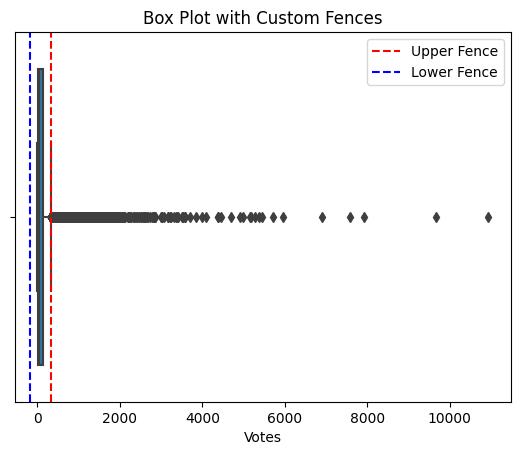

In [100]:
# Getting the upper and lower fence to check for outliers on votes
Q1_vote = new_data['Votes'].quantile(0.25)
Q3_vote = new_data['Votes'].quantile(0.75)
Q2_vote = new_data['Votes'].quantile(0.5)
IQR_vote = Q3_vote - Q1_vote
IQR_vote
Q1_vote
Q2_vote
Q3_vote
upper_fence_vote = Q3_vote + (1.5 * IQR_vote)
lower_fence_vote = Q1_vote - (1.5 * IQR_vote)

# Creating a box plot to indicate the location of upper fence and lower fence using vertical lines
sns.boxplot(x=new_data['Votes'])

# Optional: Add vertical lines for upper and lower fences
plt.axvline(x=upper_fence_vote, color='r', linestyle='--', label='Upper Fence')
plt.axvline(x=lower_fence_vote, color='b', linestyle='--', label='Lower Fence')

plt.legend()
plt.title('Box Plot with Custom Fences')
plt.xlabel('Votes')
plt.show()

The mean votes is 156.9, the median is 31.0, and the standard dev is 430.2

There are outliers observed to as high as over 10000 votes and so the focus will now be on the median value which is 31.0.  This value will suggests the folowing:

- Central Tendency: The median of 31.0 suggests that some of the Votes amount are below 31.0, and some are above it.  This makes 31.0 the middle point of the data when it is sorted in ascending order.

- Lower Votes amount: In many voting amount for each restaurant, a median of 31 is relatively close to the lower end of the Voting amounts, indicating that the overall sentiment or evaluation tends towards the left side of the Voting scale. It reflects extreme cases of low level of voting activities at the left and high leve; of voting activities to the right.  Hence, this shows that there are extreme cases of voting activities by customers at both ends with little voting activities at the middle which kind of suggest irregularity in the voting patterns of customers in response to the services they received from the various businesses.  

So if the standard deviation is 430.2, this will indicate most voting amount are within 430.2 Votings of the mean Voting of 156.9 i.e 156.9 ± 430.2 (587.1 or -273.3) suggesting extreme case of variability in the Voting amount.

However, there are 1094 non Voting participation by many customers compared to other Voting amount.

**2. Getting the distributions of Country Code, City, and Cuisines**

i. Distribution of Country Code

In [101]:
# Getting the counts of each country code
country_code_count = new_data['Country Code'].value_counts()
country_code_count

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [102]:
# Getting to know the number of unique country code
new_data['Country Code'].nunique()

15

In [103]:
# Creating a dataframe for plotting the country code
country_code_count = country_code_count.reset_index()
country_code_count

,Country Code,count
0,1,8652
1,216,434
2,215,80
3,30,60
4,214,60
5,189,60
6,148,40
7,208,34
8,14,24
9,162,22


The above shows there are 15 countries in this study

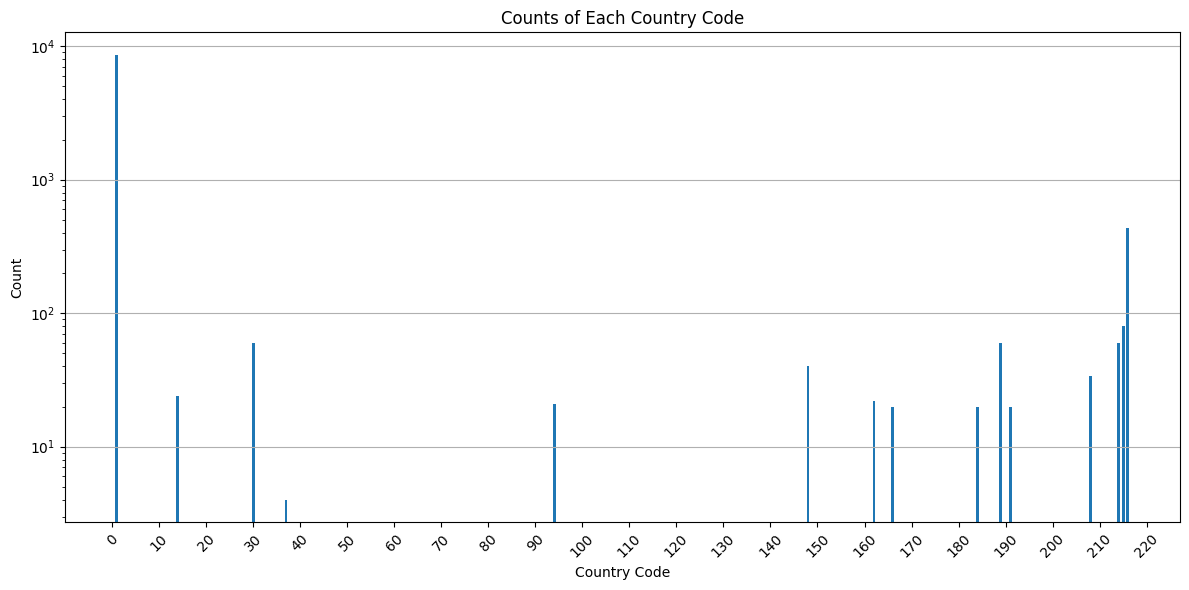

In [146]:
# Bar distribution plot for country code
plt.figure(figsize=(12, 6))  # Increase figure size
plt.bar(country_code_count['Country Code'], country_code_count['count'], width = 0.6)   #OR

# plt.bar(country_code_count['Country Code'], country_code_count['count'].astype(str)) # Convert codes to strings for better x-axis labeling

# Customize plot
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.title('Counts of Each Country Code')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')  # Optional: add a grid for better readability

# Customize x-axis ticks
tick_positions = np.arange(0, max(country_code_count['Country Code']) + 10, 10)
plt.xticks(ticks=tick_positions)

# Set log scale for y-axis to help visualize both high and low counts more effectively for wide range of counts as this
plt.yscale('log')

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The above plot shows that country code "1" had the highest business activities and 37 country code having the least business activities.

ii. Distribution of Cities

In [105]:
# Getting the counts of each city
city_counts = new_data['City'].value_counts()
city_counts

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [106]:
# Getting to know the number of unique cities
new_data['City'].nunique()

141

In [107]:
# Creating a dataframe for plotting the city distribution
city_counts = city_counts.reset_index()
city_counts

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
...,...,...
136,Panchkula,1
137,Mc Millan,1
138,Mayfield,1
139,Macedon,1


There are 141 unique observations regarding the number of cities.  Observations for the busiest cities and the least busiest cities will be visualized and this number of observations will be segmented into 20 groups with the first froup being from 0-20 and the last group from 120-142 which is obtained from the formula below:

i. number of groups = (total number of rows)/(group size)

141/20 = 7

ii. Getting the last segment:
There are no remianing rows after dividing by 20, hence the last segment will be the same as the last full group.  This means the last segment would be the group starting from index (7-1)*20 = 120 to 142

iii. Labelling the segments: Each segment can be labelled as:
- 0-19
- 20-39
- 40-59
- ...
- 120-142

In [108]:
city_counts_000_20 = city_counts[0:20]
city_counts_000_20

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Amritsar,21
7,Ahmedabad,21
8,Lucknow,21
9,Guwahati,21


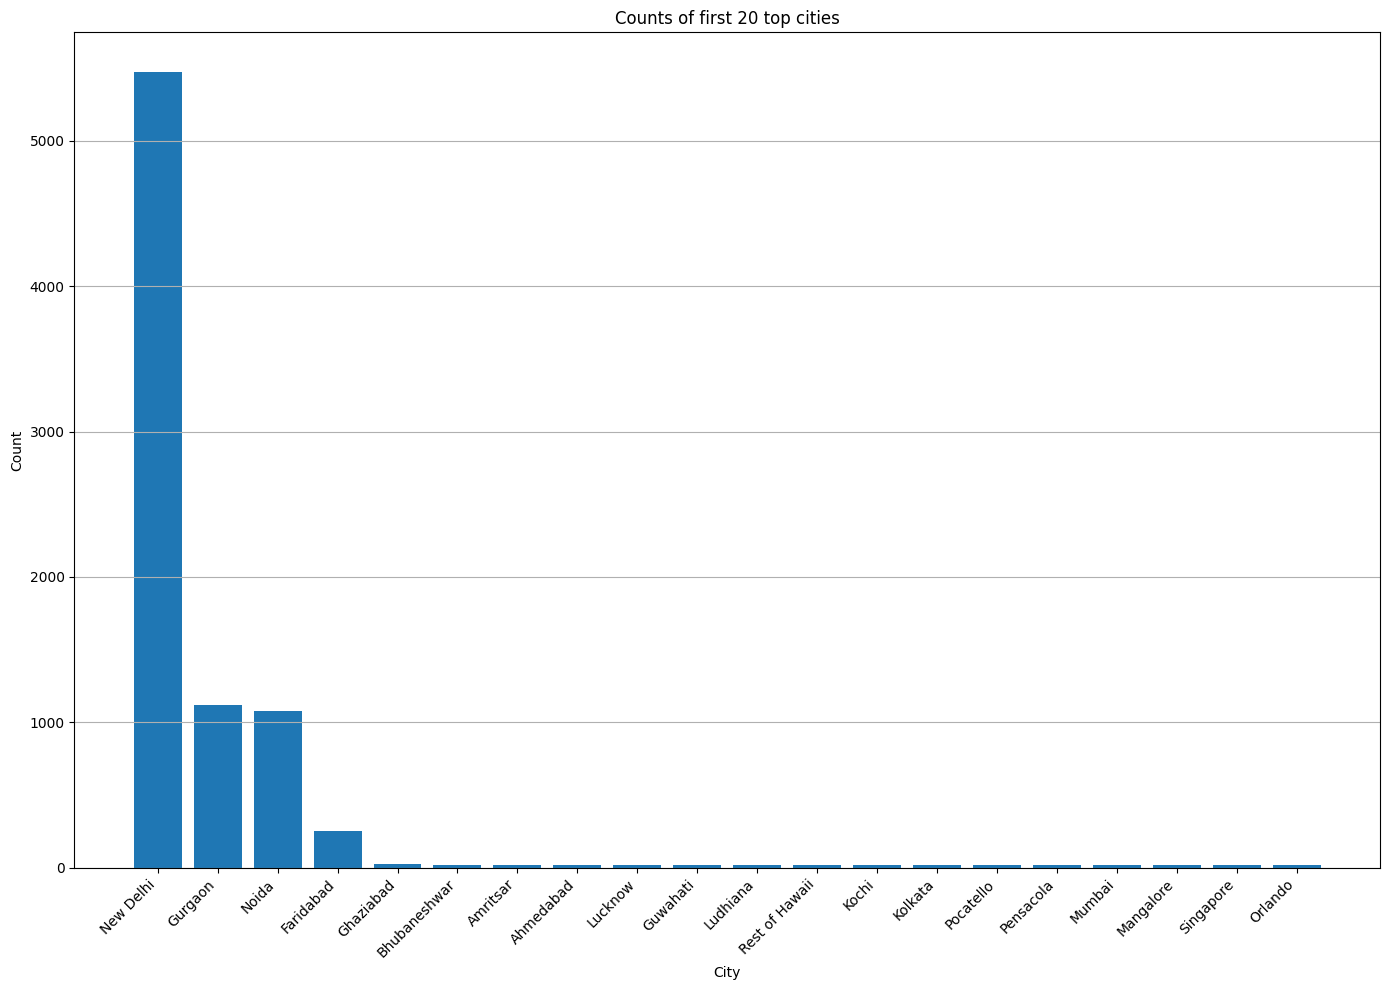

In [109]:
# Bar distribution plot for the first 20 top cities
plt.figure(figsize=(14, 10))  # Increase figure size
plt.bar(city_counts_000_20['City'], city_counts_000_20['count'])  # Convert codes to strings for better x-axis labeling

# Customize plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Counts of first 20 top cities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')  # Optional: add a grid for better readability

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The distribution above shows that New Delhi has the highest number of business activities.  The other three from the highest to the lowest are Gurgaon, Noida, and Faridabad

In [110]:
city_counts_120_142 = city_counts[121:142]
city_counts_120_142

,City,count
121,Vernonia,1
122,Trentham East,1
123,Tanunda,1
124,Princeton,1
125,Potrero,1
126,Phillip Island,1
127,Penola,1
128,Paynesville,1
129,Mohali,1
130,Palm Cove,1


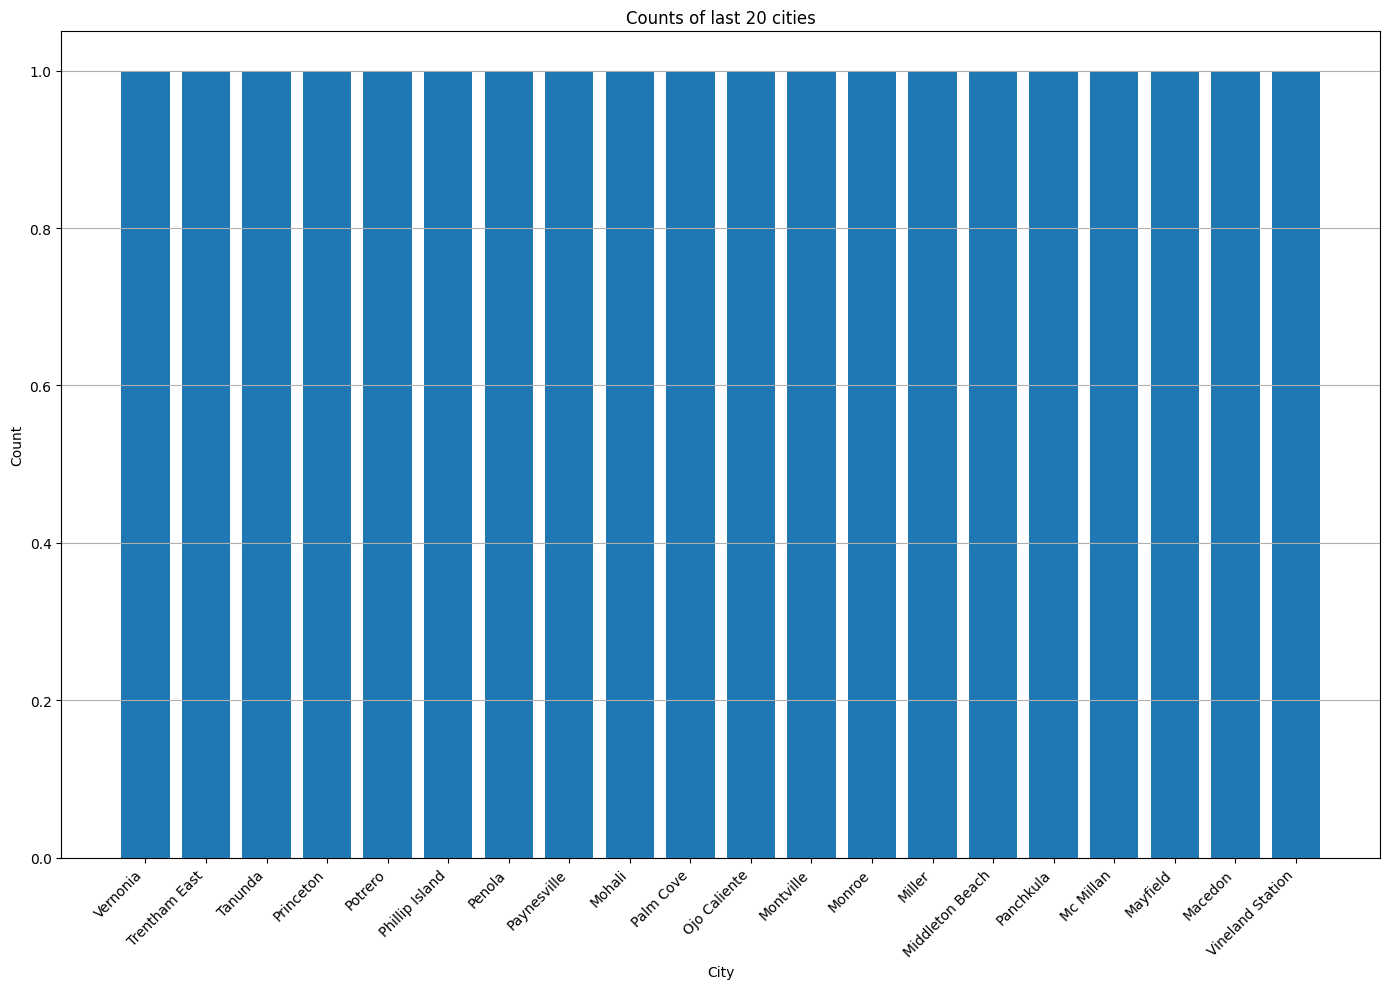

In [111]:
# Bar distribution plot for the last 20 cities
plt.figure(figsize=(14, 10))  # Increase figure size
plt.bar(city_counts_120_142['City'], city_counts_120_142['count'])  # Convert codes to strings for better x-axis labeling

# Customize plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Counts of last 20 cities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')  # Optional: add a grid for better readability

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The above visualization is a distribution showing the last 20 cities with the least number of business activities being 1.  These cities are:

- Vernonia

- Trentham East

- Tanunda

- Princeton

- Potrero

- Phillip Island

- Penola

- Paynesville

- Mohali

- Palm Cove

- Ojo Caliente

- Montville

- Monroe

- Miller

- Middleton Beach

- Panchkula

- Mc Millan

- Mayfield

- Macedon

- Vineland Station

**iii. Distribution of cuisines**

In [112]:
# Getting the counts of each cuisine
cuisine_counts = new_data['Cuisines'].value_counts()
cuisine_counts

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [113]:
# Getting to know the number of unique cuisines
new_data['Cuisines'].nunique()

1825

In [114]:
# Creating a dataframe for plotting the cuisine distribution
# cuisine_counts_001_300 = cuisine_counts.iloc[1:300].reset_index()
# cuisine_counts_001_300

cuisine_counts = cuisine_counts.reset_index()
# cuisine_counts = cuisine_counts.drop(columns=['level_0', 'index'])
cuisine_counts

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
...,...,...
1820,"Bengali, Fast Food",1
1821,"North Indian, Rajasthani, Asian",1
1822,"Chinese, Thai, Malaysian, Indonesian",1
1823,"Bakery, Desserts, North Indian, Bengali, South...",1


There are 1824 unique observations regarding the number of cuisines.  Observations for the highest ordered cuisines and the lowest order cuisines will be visualized and this number of observations will be segmented into 20 groups with the first froup being from 0-20 and the last group from 1800-1825 which is obtained from the formula below:

i. number of groups = (total number of rows)/(group size)

1824/20 = 91

ii. Getting the last segment:
There are no remianing rows after dividing by 20, hence the last segment will be the same as the last full group.  This means the last segment would be the group starting from index (91-1)*20 = 1800 to 1824

iii. Labelling the segments: Each segment can be labelled as:
- 0-19
- 20-39
- 40-59
- ...
- 1800-1823

In [115]:
cuisine_counts_000_20 = cuisine_counts[0:20]
cuisine_counts_000_20

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


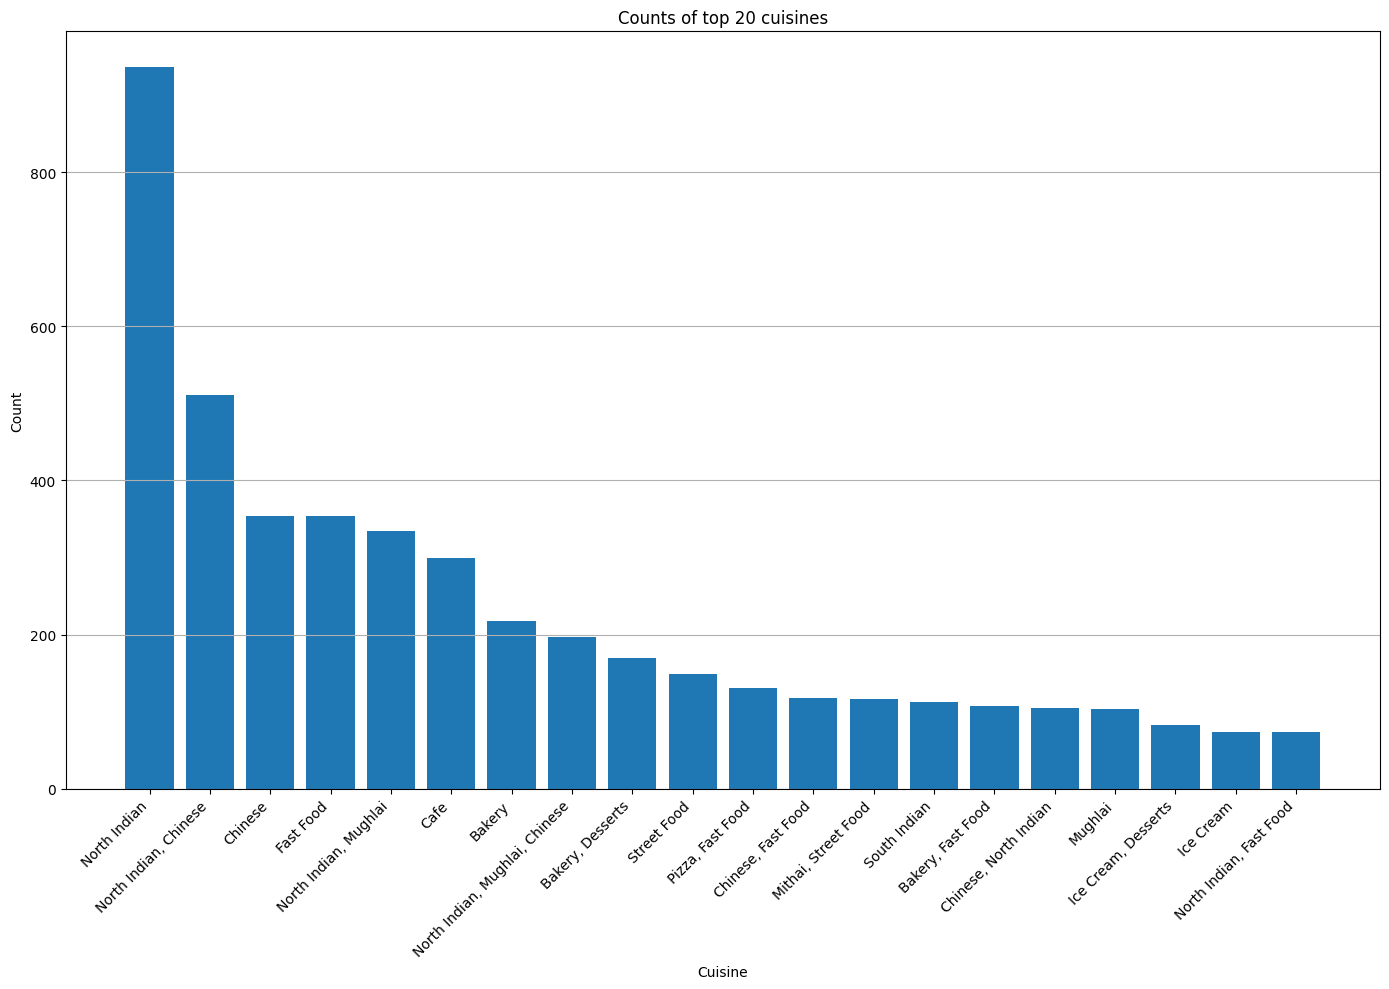

In [116]:
# Bar distribution plot for first 20 top cuisines
plt.figure(figsize=(14, 10))  # Increase figure size
plt.bar(cuisine_counts_000_20['Cuisines'], cuisine_counts_000_20['count'])

# Customize plot
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Counts of top 20 cuisines')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')  # Optional: add a grid for better readability

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The dustribution above shows the first five cuisines whuch are likely the top five high in demand cuisines which are:

- North Indian

- North Indian, Chinese

- Chinese

- Fast Food

- North Indian, Mughlai

In [117]:
cuisine_counts_1805_1825 = cuisine_counts[1805:1825]
cuisine_counts_1805_1825

,Cuisines,count
1805,"Chinese, Thai, Japanese, Asian",1
1806,"Healthy Food, North Indian",1
1807,"Mithai, Street Food, South Indian, Chinese, No...",1
1808,"Chinese, Assamese",1
1809,"Mithai, Bakery, Street Food",1
1810,"North Indian, Mediterranean, European, Asian, ...",1
1811,"Healthy Food, Fast Food, Salad",1
1812,"Bakery, Desserts, Bakery",1
1813,"Italian, Burger, Charcoal Grill",1
1814,"Chinese, North Indian, Continental, Mexican",1


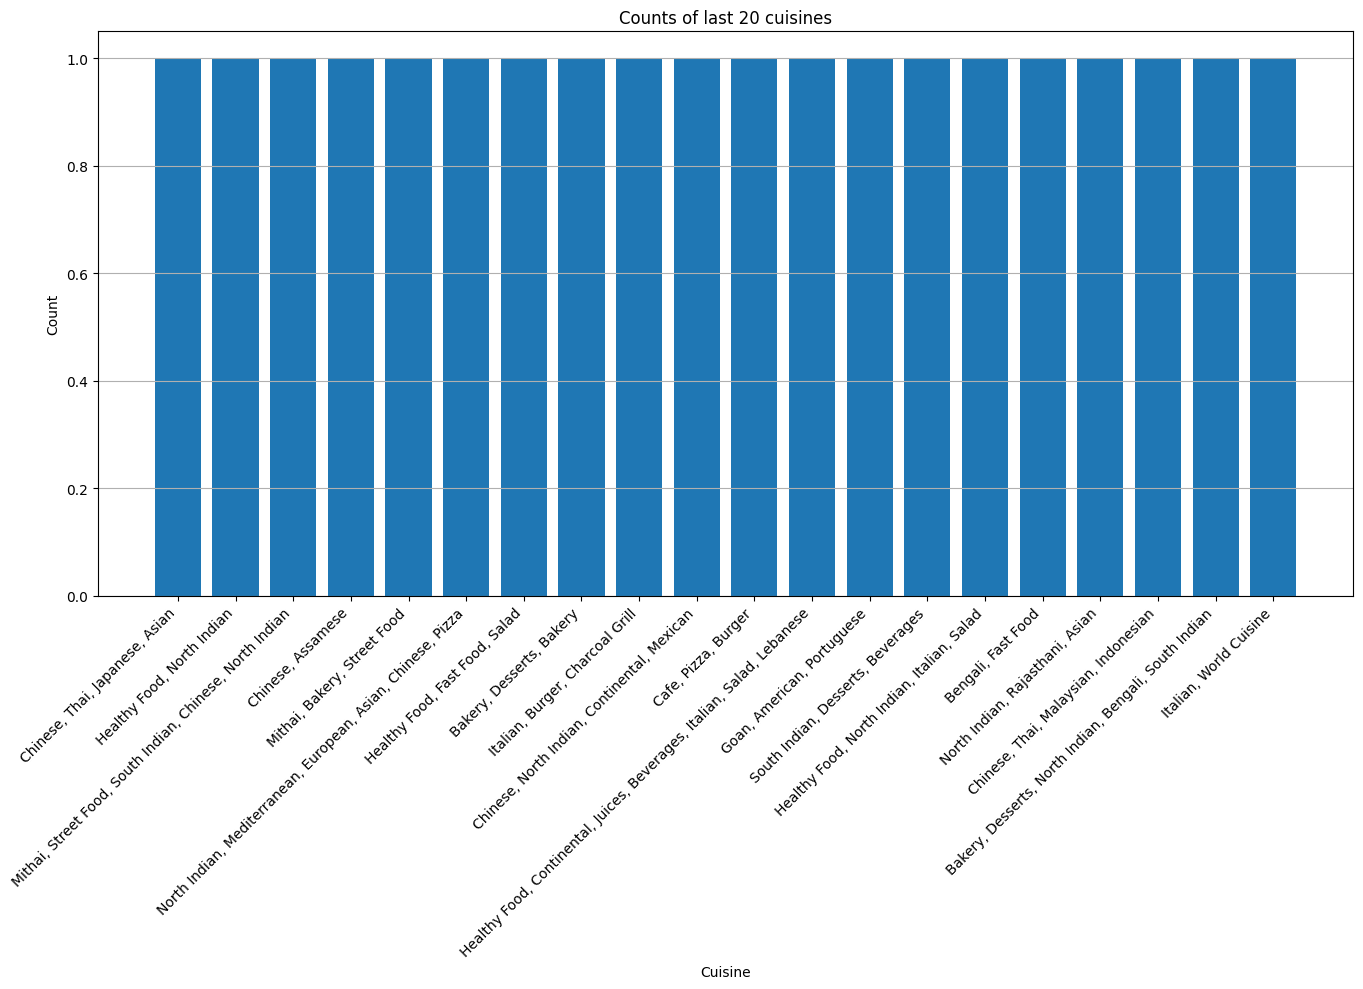

In [118]:
# Bar distribution plot for the last 20 cuisines
plt.figure(figsize=(14, 10))  # Increase figure size
plt.bar(cuisine_counts_1805_1825['Cuisines'], cuisine_counts_1805_1825['count'])  

# Customize plot
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Counts of last 20 cuisines')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y')  # Optional: add a grid for better readability

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The least five in demand cuisines are:

- Chinese, Thai, Japanese, Asian

- Healthy Food, North Indian

- Mithai, Street Food, South Indian, Chinese, North Indian

- Chinese, Assamese

- Mithai, Bakery, Street Food

**3. Top cuisines with the highest number of restaurants**

In [119]:
restaurant_counts_by_cuisines = new_data.groupby('Cuisines')['Restaurant Name'].value_counts()
restaurant_counts_by_cuisines

Cuisines                         Restaurant Name      
Afghani                          Afghan Indian            1
                                 Burj Al Arab             1
                                 Kabul Delhi              1
                                 Pak Afghan Restaurant    1
Afghani, Mughlai, Chinese        Al- Sheikh               1
                                                         ..
Western, Asian, Cafe             MONKS                    1
Western, Fusion, Fast Food       I Am                     1
World Cuisine                    Gaga Manjero             1
World Cuisine, Mexican, Italian  Cafemiz                  1
World Cuisine, Patisserie, Cafe  Ceviz Aac۱               1
Name: count, Length: 7940, dtype: int64

In [120]:
restaurant_counts_by_cuisines_aggregated = restaurant_counts_by_cuisines.groupby(level=0).sum()
restaurant_counts_by_cuisines_aggregated

Cuisines
Afghani                                      4
Afghani, Mughlai, Chinese                    1
Afghani, North Indian                        1
Afghani, North Indian, Pakistani, Arabian    1
African                                      1
                                            ..
Western, Asian, Cafe                         1
Western, Fusion, Fast Food                   1
World Cuisine                                1
World Cuisine, Mexican, Italian              1
World Cuisine, Patisserie, Cafe              1
Name: count, Length: 1825, dtype: int64

In [121]:
sorted_restaurant_counts_by_cuisines_aggregated= restaurant_counts_by_cuisines_aggregated.sort_values(ascending=False)
sorted_restaurant_counts_by_cuisines_aggregated.head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

**Top cities with the highest number of restaurants**

In [122]:
restaurant_counts_by_cities = new_data.groupby('City')['Restaurant Name'].value_counts()
restaurant_counts_by_cities

City       Restaurant Name                 
Abu Dhabi  Applebee's                          1
           Bait El Khetyar                     1
           Cho Gao - Crowne Plaza Abu Dhabi    1
           Denny's                             1
           Famous Dave's Barbecue              1
                                              ..
stanbul    Leman K_lt_r                        1
           Naml۱ Gurme                         1
           Starbucks                           1
           Valonia                             1
           Walter's Coffee Roastery            1
Name: count, Length: 7974, dtype: int64

In [123]:
index = restaurant_counts_by_cities.index
index

MultiIndex([('Abu Dhabi',                       'Applebee's'),
            ('Abu Dhabi',                  'Bait El Khetyar'),
            ('Abu Dhabi', 'Cho Gao - Crowne Plaza Abu Dhabi'),
            ('Abu Dhabi',                          'Denny's'),
            ('Abu Dhabi',           'Famous Dave's Barbecue'),
            ('Abu Dhabi',                           'Gazebo'),
            ('Abu Dhabi',                    'Genghis Grill'),
            ('Abu Dhabi',                      'Hot Palayok'),
            ('Abu Dhabi',                 'Indian By Nature'),
            ('Abu Dhabi',                     'Olive Garden'),
            ...
            (  'stanbul',                 'Draft Gastro Pub'),
            (  'stanbul',                     'Emirgan S_ti'),
            (  'stanbul',                            'Huqqa'),
            (  'stanbul',              'J'adore Chocolatier'),
            (  'stanbul',                 'Karak_y G_ll_olu'),
            (  'stanbul',              

In [124]:
restaurant_counts_by_cities_aggregated = restaurant_counts_by_cities.groupby(level=0).sum()
restaurant_counts_by_cities_aggregated

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
stanbul            14
Name: count, Length: 141, dtype: int64

In [125]:
sorted_restaurant_counts_by_cities_aggregated = restaurant_counts_by_cities_aggregated.sort_values(ascending=False)
sorted_restaurant_counts_by_cities_aggregated.head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
Name: count, dtype: int64

Afghani among all the cuisines is being served in 4 restaurants while New Delhi has the highest number of restaurants